# Problem Statement 3:
You are working in an e-commerce company, and your company has put forward a task to
analyze the customer reviews for various products. You are supposed to create a report that
classifies the products based on the customer reviews.


# Dataset Information:
The Reviews.csv dataset contains 60145 rows and 10 columns.

# Feature Name Description
- Id           ------------->       Record ID
- ProductId  ----------->        Product ID
- UserId      ------------->         User ID who posted the review
- ProfileName      -------------->      Profile name of the User
- HelpfullnessNumerator    ---------->   Numerator of the helpfulness of the review
- HelpfullnessDenominator    ------->    Denominator of the helpfulness of the review
- Score      ----------------->    Product Rating
- Time      ------------------>        Review time in timestamp
- Summary       ------------->       Summary of the review
- Text         ---------->         Actual text of the review

- 1. Find various trends and patterns in the reviews data, create useful insights that best describe the product quality.
- 2. Classify each review based on the sentiment associated with the same.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

In [2]:
review=pd.read_csv('Reviews.csv',encoding='latin-1')
review.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [3]:
# Extract the timestamp from the DataFrame
timestamp = review['Time']

# Convert the timestamp to a datetime object
date = pd.to_datetime(timestamp, unit='s')
date

0        2011-04-27
1        2012-09-07
2        2008-08-18
3        2011-06-13
4        2012-10-21
            ...    
568449   2011-03-09
568450   2012-03-09
568451   2012-02-21
568452   2012-03-13
568453   2012-05-31
Name: Time, Length: 568454, dtype: datetime64[ns]

In [4]:
# Extract year, month, week of the month, and day of the week
year = date.dt.year
month = date.dt.month
week_of_month = (date.dt.day - 1) // 7 + 1  # Calculate the week of the month
day_of_week = date.dt.strftime('%A')

In [5]:
# Create a new DataFrame with the converted time information
converted_time = pd.DataFrame({
    'Date':date,
    'Year': year,
    'Month': month,
    'Week_of_Month': week_of_month,
    'Day_of_Week': day_of_week
})
converted_time

,Date,Year,Month,Week_of_Month,Day_of_Week
0,2011-04-27,2011,4,4,Wednesday
1,2012-09-07,2012,9,1,Friday
2,2008-08-18,2008,8,3,Monday
3,2011-06-13,2011,6,2,Monday
4,2012-10-21,2012,10,3,Sunday
...,...,...,...,...,...
568449,2011-03-09,2011,3,2,Wednesday
568450,2012-03-09,2012,3,2,Friday
568451,2012-02-21,2012,2,3,Tuesday
568452,2012-03-13,2012,3,2,Tuesday


In [6]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
review.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [8]:
for column in review.select_dtypes(include='object').columns:
    print(f"Unique values in {column}:")
    print(review[column].unique())
    print()

Unique values in ProductId:
['B001E4KFG0' 'B00813GRG4' 'B000LQOCH0' ... 'B003S1WTCU' 'B004I613EE'
 'B001LR2CU2']

Unique values in UserId:
['A3SGXH7AUHU8GW' 'A1D87F6ZCVE5NK' 'ABXLMWJIXXAIN' ... 'A28KG5XORO54AY'
 'A121AA1GQV751Z' 'A3LGQPJCZVL9UC']

Unique values in ProfileName:
['delmartian' 'dll pa' 'Natalia Corres "Natalia Corres"' ...
 'Lettie D. Carter' 'pksd "pk_007"' 'srfell17']

Unique values in Summary:
['Good Quality Dog Food' 'Not as Advertised' '"Delight" says it all' ...
 'Will not do without' 'Perfect for our maltipoo'
 'Favorite Training and reward treat']

Unique values in Text:
['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'
 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or 

In [9]:
df=pd.concat([review,converted_time],axis=1)
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Date,Year,Month,Week_of_Month,Day_of_Week
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,2011,4,4,Wednesday
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,2012,9,1,Friday


In [10]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
Date                       0
Year                       0
Month                      0
Week_of_Month              0
Day_of_Week                0
dtype: int64

df.drop(columns=['Date'],axis=1).head(2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      568454 non-null  int64         
 1   ProductId               568454 non-null  object        
 2   UserId                  568454 non-null  object        
 3   ProfileName             568428 non-null  object        
 4   HelpfulnessNumerator    568454 non-null  int64         
 5   HelpfulnessDenominator  568454 non-null  int64         
 6   Score                   568454 non-null  int64         
 7   Time                    568454 non-null  int64         
 8   Summary                 568427 non-null  object        
 9   Text                    568454 non-null  object        
 10  Date                    568454 non-null  datetime64[ns]
 11  Year                    568454 non-null  int32         
 12  Month                   568454

In [12]:
df[df.duplicated(subset=['Id','UserId','ProfileName','Summary'],keep=False)].count()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Date                      0
Year                      0
Month                     0
Week_of_Month             0
Day_of_Week               0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Date                      0
Year                      0
Month                     0
Week_of_Month             0
Day_of_Week               0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      568401 non-null  int64         
 1   ProductId               568401 non-null  object        
 2   UserId                  568401 non-null  object        
 3   ProfileName             568401 non-null  object        
 4   HelpfulnessNumerator    568401 non-null  int64         
 5   HelpfulnessDenominator  568401 non-null  int64         
 6   Score                   568401 non-null  int64         
 7   Time                    568401 non-null  int64         
 8   Summary                 568401 non-null  object        
 9   Text                    568401 non-null  object        
 10  Date                    568401 non-null  datetime64[ns]
 11  Year                    568401 non-null  int32         
 12  Month                   568401 non-

In [15]:
for name in df.columns:
    print(f"column {name} has {len(set(df.loc[:,name]))} unique values")

column Id has 568401 unique values
column ProductId has 74257 unique values
column UserId has 256042 unique values
column ProfileName has 218412 unique values
column HelpfulnessNumerator has 231 unique values
column HelpfulnessDenominator has 234 unique values
column Score has 5 unique values
column Time has 3168 unique values
column Summary has 295734 unique values
column Text has 393560 unique values
column Date has 3168 unique values
column Year has 14 unique values
column Month has 12 unique values
column Week_of_Month has 5 unique values
column Day_of_Week has 7 unique values


In [16]:
print('Id_max  :',df['Id'].value_counts().max(),'                                         Id_min :',df['Id'].value_counts().min())
print('ProductId_max  :',df['ProductId'].value_counts().max(),'                         ProductId_min :',df['ProductId'].value_counts().min())
print('UserId_max  :',df['UserId'].value_counts().max(),'                                  UserId_min :',df['UserId'].value_counts().min())
print('ProfileName_max  :',df['ProfileName'].value_counts().max(),'                          ProfileName_min :',df['ProfileName'].value_counts().min())
print('HelpfulnessNumerator_max  :',df['HelpfulnessNumerator'].value_counts().max(),'          HelpfulnessNumerator_min :',df['HelpfulnessNumerator'].value_counts().min())
print('HelpfulnessDenominator_max  :',df['HelpfulnessDenominator'].value_counts().max(),'          HelpfulnessDenominator_min :',df['HelpfulnessDenominator'].value_counts().min())
print('Score_max  :',df['Score'].value_counts().max(),'                                     Score_min :',df['Score'].value_counts().min())
print('Year_max  :',df['Year'].value_counts().max(),'                                        Year_min :',df['Year'].value_counts().min())
print('Month_max  :',df['Month'].value_counts().max(),'                               Month_min :',df['ProductId'].value_counts().min())


Id_max  : 1                                          Id_min : 1
ProductId_max  : 913                          ProductId_min : 1
UserId_max  : 448                                   UserId_min : 1
ProfileName_max  : 451                           ProfileName_min : 1
HelpfulnessNumerator_max  : 303804           HelpfulnessNumerator_min : 1
HelpfulnessDenominator_max  : 270030           HelpfulnessDenominator_min : 1
Score_max  : 363102                                      Score_min : 29743
Year_max  : 198645                                         Year_min : 6
Month_max  : 55760                                Month_min : 1


These steps has helped me to gain an initial understanding of the dataset's structure, identify missing values, and explore the available features.

# 2.Text Preprocessing:
Clean the text data by removing special characters, punctuation, and numbers. Convert the text to lowercase and remove stop words (commonly occurring words with little semantic value). Perform tokenization to split the text into individual words or tokens. Apply techniques like stemming or lemmatization to reduce words to their base form.

# Clean the text in the dataset:
1.importing the nlt ,re libraries:

In [17]:
import string
import unicodedata   # for removing accented and special chracters
import re
import nltk
from nltk.corpus import stopwords    # for stopwords Removal
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob       # for calculating Polarity and Subjectivity
nltk.download('punkt')
# Download stopwords and lemmatizer data
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vijay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vijay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vijay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
df['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 568401, dtype: object

In [19]:
# Create 'review' column from 'Text' column
df['Review'] = df['Text']
df['Review']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Review, Length: 568401, dtype: object

In [20]:
# Define the text cleaning and processing functions
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

In [21]:
def clean_text(text):
    # Remove special characters and numbers
    return re.sub(r'[^a-zA-Z]', ' ', text)

review['Text']=review.apply(lambda x :clean_text(x['Text']),axis=1)   

In [22]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)


In [23]:
def stem_text(text):
    stemmer = PorterStemmer()
    word_tokens = word_tokenize(text)
    stemmed_text = [stemmer.stem(word) for word in word_tokens]
    return ' '.join(stemmed_text)


In [24]:
def preprocess_text(text):
    cleaned_text = clean_text(text)
    text_without_stopwords = remove_stopwords(cleaned_text)
    preprocessed_text = stem_text(text_without_stopwords)
    return preprocessed_text


In [25]:
# Apply the preprocessing functions to the 'Review' column
df['Cleaned_Review'] = df['Review'].apply(preprocess_text)


In [26]:
# Display the DataFrame with the cleaned text
df[['Review', 'Cleaned_Review']]


,Review,Cleaned_Review
0,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...
1,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanut peanut a...
2,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...
3,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...
4,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...
...,...,...
568449,Great for sesame chicken..this is a good if no...,great sesam chicken good better restur eaten h...
568450,I'm disappointed with the flavor. The chocolat...,disappoint flavor chocol note especi weak milk...
568451,"These stars are small, so you can give 10-15 o...",star small give one train session tri train do...
568452,These are the BEST treats for training and rew...,best treat train reward dog good groom lower c...


In [27]:
# Delete the 'Text' column if not needed anymore
df.drop(columns=['Text'],inplace=True)
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Date', 'Year',
       'Month', 'Week_of_Month', 'Day_of_Week', 'Review', 'Cleaned_Review'],
      dtype='object')

- 1.Removed special characters, punctuation, and numbers using a list comprehension.

- 2.Converted the text to lowercase.

- 3.Tokenized the text using word_tokenize() from NLTK.

- 4.Removed stop words by filtering out words present in the stop_words set.

- 5.Performed stemming using PorterStemmer from NLTK to reduce words to their base form. Uncomment the line with lemmatization if you prefer to use lemmatization instead.

- The resulting cleaned and preprocessed tokens are stored in a new column named 'cleaned_review' in the DataFrame 'df'.

# Overall Statistics:
Calculating basic statistics such as mean, median, mode, and standard deviation for the 'Score' and 'Helpfulness' variables.
Analyze the distribution of scores to understand the general sentiment.

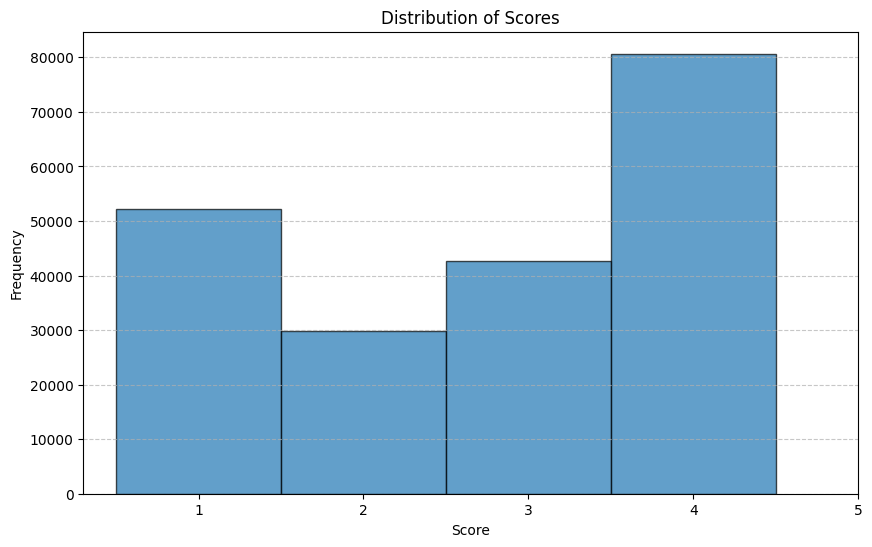

Basic Statistics for Score:
count    568401.000000
mean          4.183297
std           1.310376
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

Median Score: 5.0
Mode Score: 5
Standard Deviation of Score: 1.3103758607057756

Basic Statistics for HelpfulnessNumerator_stats:
count    568401.000000
mean          1.743903
std           7.636845
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         866.000000
Name: HelpfulnessNumerator, dtype: float64


In [28]:
score_stats = df['Score'].describe()
HelpfulnessNumerator_stats = df['HelpfulnessNumerator'].describe()

# Calculate median and mode for 'Score'
score_median = df['Score'].median()
score_mode = df['Score'].mode()[0]  # Mode might return multiple values, so we take the first one

# Calculate standard deviation for 'Score'
score_std = df['Score'].std()

# Analyze the distribution of scores
plt.figure(figsize=(10, 6))
plt.hist(df['Score'], bins=np.arange(1, 6) - 0.5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display results
print("Basic Statistics for Score:")
print(score_stats)
print("\nMedian Score:", score_median)
print("Mode Score:", score_mode)
print("Standard Deviation of Score:", score_std)

print("\nBasic Statistics for HelpfulnessNumerator_stats:")
print(HelpfulnessNumerator_stats)


In [29]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Date', 'Year',
       'Month', 'Week_of_Month', 'Day_of_Week', 'Review', 'Cleaned_Review'],
      dtype='object')

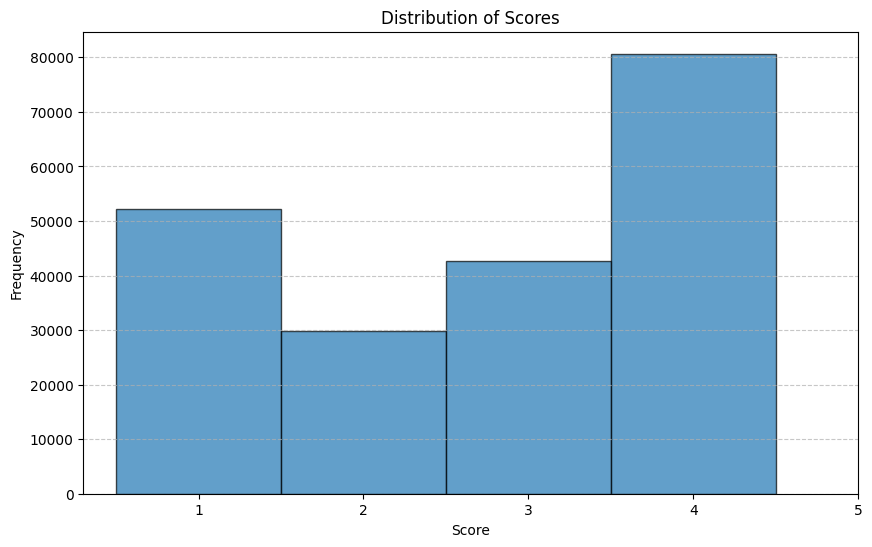

Basic Statistics for Score:
count    568401.000000
mean          4.183297
std           1.310376
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

Median Score: 5.0
Mode Score: 5
Standard Deviation of Score: 1.3103758607057756

Basic Statistics for HelpfulnessDenominator_stats:
count    568401.000000
mean          2.227911
std           8.288820
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max         923.000000
Name: HelpfulnessDenominator, dtype: float64


In [30]:
score_stats = df['Score'].describe()
HelpfulnessDenominator_stats = df['HelpfulnessDenominator'].describe()

# Calculate median and mode for 'Score'
score_median = df['Score'].median()
score_mode = df['Score'].mode()[0]  # Mode might return multiple values, so we take the first one

# Calculate standard deviation for 'Score'
score_std = df['Score'].std()

# Analyze the distribution of scores
plt.figure(figsize=(10, 6))
plt.hist(df['Score'], bins=np.arange(1, 6) - 0.5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display results
print("Basic Statistics for Score:")
print(score_stats)
print("\nMedian Score:", score_median)
print("Mode Score:", score_mode)
print("Standard Deviation of Score:", score_std)

print("\nBasic Statistics for HelpfulnessDenominator_stats:")
print(HelpfulnessDenominator_stats)


# 1. Date Analysis:

# a. Overall Trends:
Calculate basic statistics for the 'Year,' 'Month,' 'Week_of_Month,' and 'Day_of_Week' columns to understand the overall distribution.

In [31]:
year_stats = df['Year'].describe()
month_stats = df['Month'].describe()
week_of_month_stats = df['Week_of_Month'].describe()
day_of_week_stats = df['Day_of_Week'].value_counts()


print("Basic Statistics for Year:")
print(year_stats)

print("\nBasic Statistics for Month:")
print(month_stats)

print("\nBasic Statistics for Week_of_Month:")
print(week_of_month_stats)

print("\nCount of Events for Each Day_of_Week:")
print(day_of_week_stats)

Basic Statistics for Year:
count    568401.000000
mean       2010.582979
std           1.531724
min        1999.000000
25%        2010.000000
50%        2011.000000
75%        2012.000000
max        2012.000000
Name: Year, dtype: float64

Basic Statistics for Month:
count    568401.000000
mean          6.460381
std           3.406355
min           1.000000
25%           3.000000
50%           7.000000
75%           9.000000
max          12.000000
Name: Month, dtype: float64

Basic Statistics for Week_of_Month:
count    568401.000000
mean          2.698780
std           1.262721
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Week_of_Month, dtype: float64

Count of Events for Each Day_of_Week:
Day_of_Week
Thursday     87051
Wednesday    85986
Tuesday      85850
Monday       85360
Friday       79679
Sunday       72791
Saturday     71684
Name: count, dtype: int64


In [32]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Date', 'Year',
       'Month', 'Week_of_Month', 'Day_of_Week', 'Review', 'Cleaned_Review'],
      dtype='object')

# b. Time Series Analysis:
Plot time series graphs for each variable ('Year,' 'Month,' 'Week_of_Month,' 'Day_of_Week') to identify any patterns or trends over time.
- Analyze the distribution of events across different days of the week. Are there specific days with higher or lower occurrences?
            
       Weekend vs. Weekday Comparison:
- Compare the frequency of events on weekends versus weekdays.

       Most Active Days:
- Identify the most and least active days based on the occurrence of events.
 
       Month-wise Analysis:
- Explore if there are specific months that stand out in terms of frequency.

Most Active Day: 2012-10-16 00:00:00
Least Active Day: 2003-06-15 00:00:00

Event Frequency Comparison (Weekend vs. Weekday):
Weekday
Weekday    568401
Name: count, dtype: int64


Text(0, 0.5, 'Frequency')

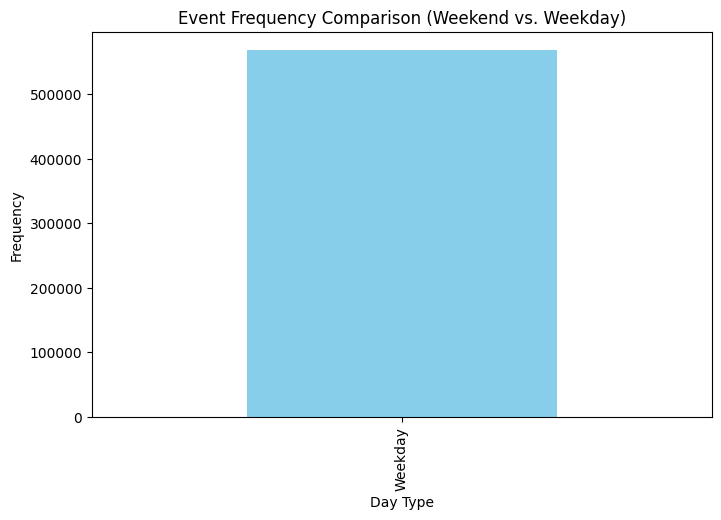

In [33]:
df['Weekday'] = df['Date']

# Identify the most and least active days
most_active_day = df['Weekday'].value_counts().idxmax()
least_active_day = df['Weekday'].value_counts().idxmin()

# Compare the frequency of events on weekends vs. weekdays
weekday_vs_weekend = df['Weekday'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
event_frequency_comparison = weekday_vs_weekend.value_counts()

# Display results
print("Most Active Day:", most_active_day)
print("Least Active Day:", least_active_day)
print("\nEvent Frequency Comparison (Weekend vs. Weekday):")
print(event_frequency_comparison)

# Plot bar chart for event frequency comparison
plt.figure(figsize=(8, 5))
event_frequency_comparison.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Event Frequency Comparison (Weekend vs. Weekday)')
plt.xlabel('Day Type')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Time Series Analysis - Week_of_Month')

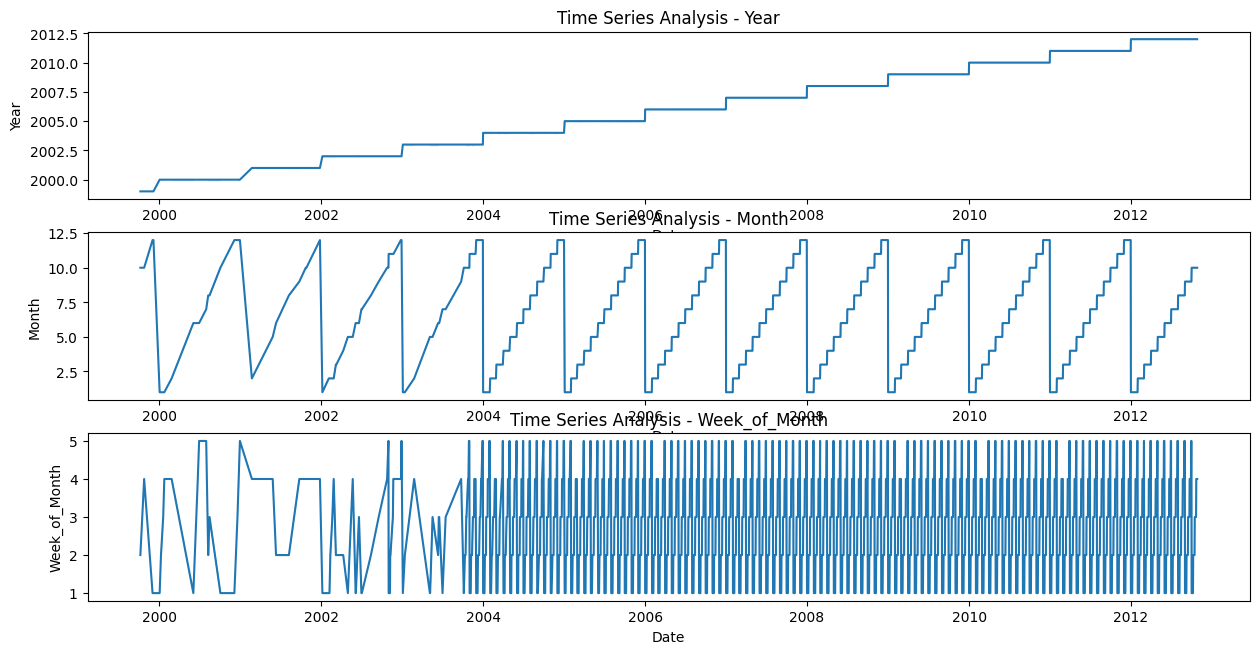

In [34]:
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index for time series plotting
df.set_index('Date', inplace=True)

# Plot time series graphs for each variable
plt.figure(figsize=(15, 10))

# Time series plot for 'Year'
plt.subplot(4, 1, 1)
sns.lineplot(data=df, x=df.index, y='Year')
plt.title('Time Series Analysis - Year')

# Time series plot for 'Month'
plt.subplot(4, 1, 2)
sns.lineplot(data=df, x=df.index, y='Month')
plt.title('Time Series Analysis - Month')

# Time series plot for 'Week_of_Month'
plt.subplot(4, 1, 3)
sns.lineplot(data=df, x=df.index, y='Week_of_Month')
plt.title('Time Series Analysis - Week_of_Month')

In [35]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Year', 'Month',
       'Week_of_Month', 'Day_of_Week', 'Review', 'Cleaned_Review', 'Weekday'],
      dtype='object')

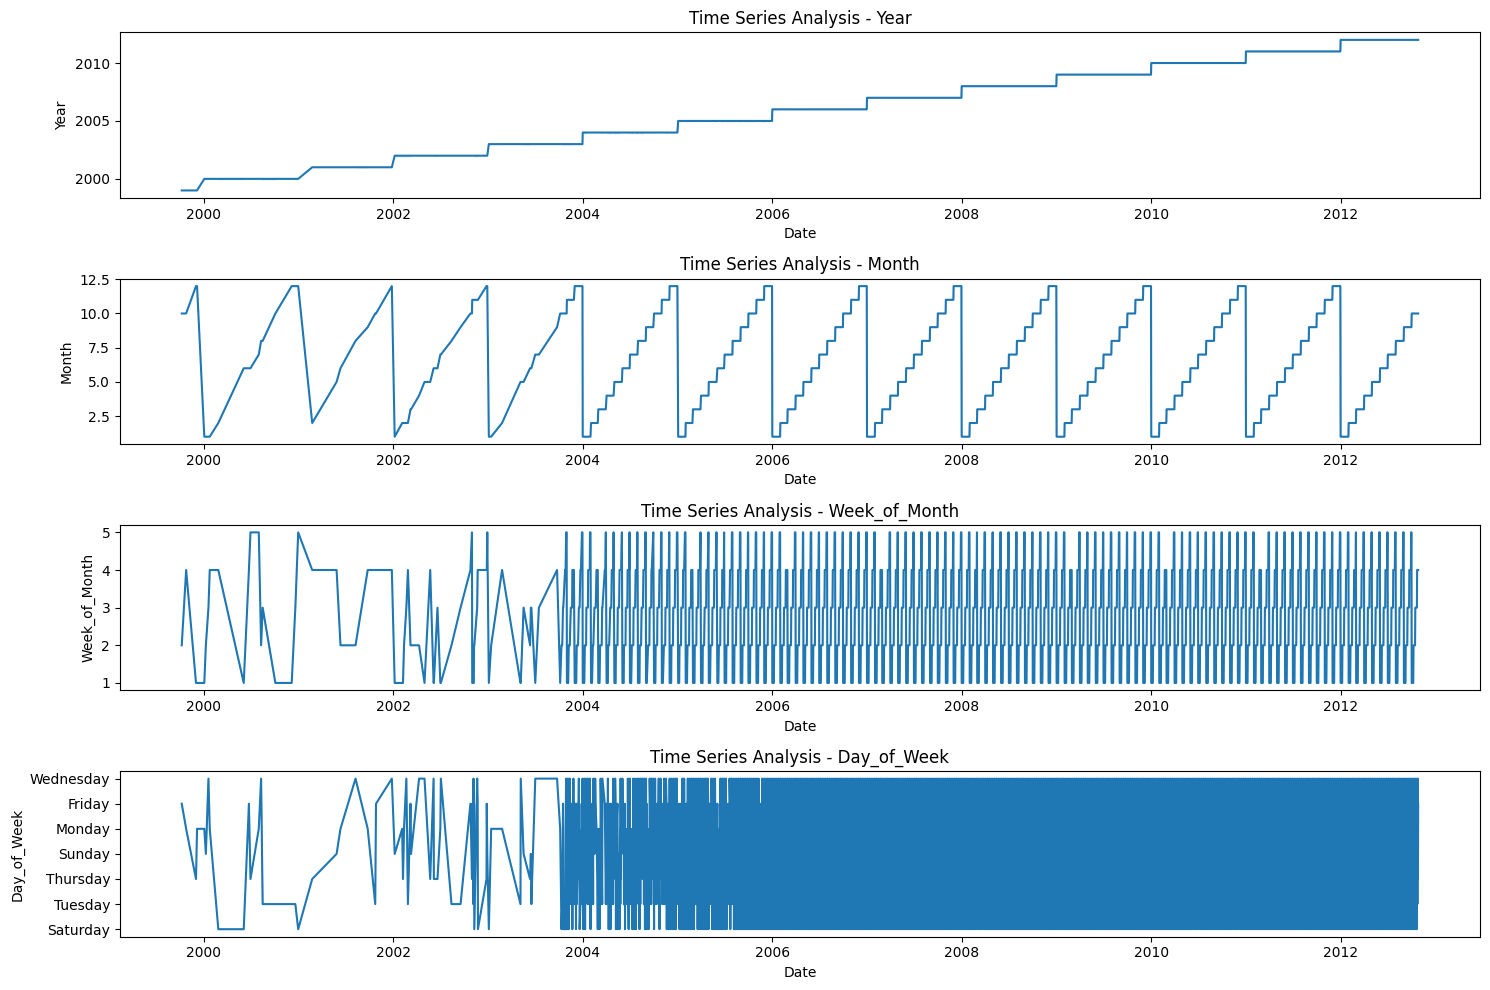

In [36]:
# Plot time series graphs for each variable
plt.figure(figsize=(15, 10))

# Time series plot for 'Year'
plt.subplot(4, 1, 1)
sns.lineplot(data=df, x=df.index, y='Year')
plt.title('Time Series Analysis - Year')

# Time series plot for 'Month'
plt.subplot(4, 1, 2)
sns.lineplot(data=df, x=df.index, y='Month')
plt.title('Time Series Analysis - Month')

# Time series plot for 'Week_of_Month'
plt.subplot(4, 1, 3)
sns.lineplot(data=df, x=df.index, y='Week_of_Month')
plt.title('Time Series Analysis - Week_of_Month')

# Time series plot for 'Day_of_Week'
plt.subplot(4, 1, 4)
sns.lineplot(data=df, x=df.index, y='Day_of_Week')
plt.title('Time Series Analysis - Day_of_Week')

plt.tight_layout()
plt.show()

# 4. Additional Analysis:
a. Yearly Analysis:
- Looking for any noticeable patterns or trends on a yearly basis.
b. Seasonality:
- Checking for seasonality in the data, especially if the dataset covers multiple years.

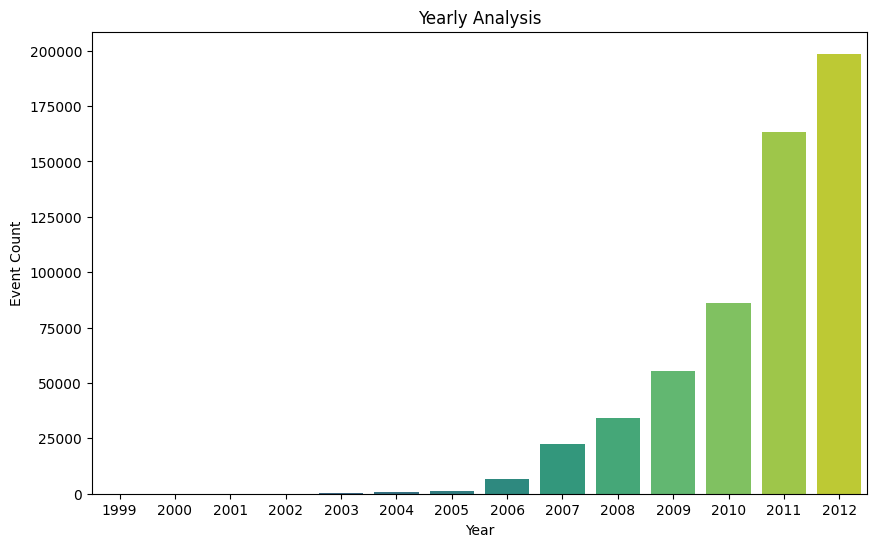

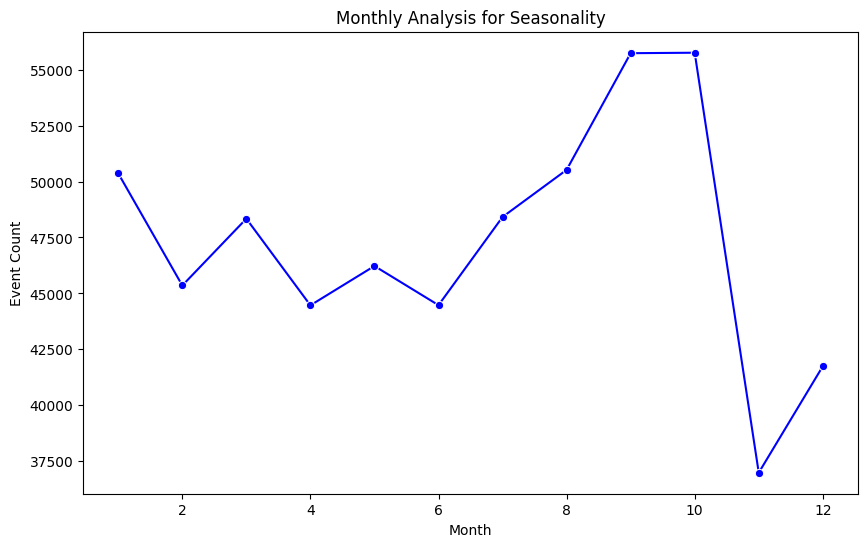

In [37]:
yearly_analysis = df.groupby('Year').size()

# Plot yearly analysis
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_analysis.index, y=yearly_analysis.values, palette='viridis')
plt.title('Yearly Analysis')
plt.xlabel('Year')
plt.ylabel('Event Count')
plt.show()

# Monthly Analysis for Seasonality
monthly_analysis = df.groupby('Month').size()

# Plot monthly analysis
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_analysis.index, y=monthly_analysis.values, marker='o', color='blue')
plt.title('Monthly Analysis for Seasonality')
plt.xlabel('Month')
plt.ylabel('Event Count')
plt.show()

# 1. Find various trends and patterns in the reviews data, create useful insights that
best describe the product quality

To find trends and patterns in the reviews data and derive insights about product quality, you can perform various exploratory data analysis (EDA) techniques on the 'review' DataFrame. Here are some steps you can follow:

# Word Frequency Analysis:
we can Analyze the frequency of words in the reviews to identify commonly mentioned terms related to product quality. This can give you an idea of what customers frequently mention in their reviews.

In [46]:
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
# Combine all reviews into a single string
all_reviews = ' '.join(df['Review'].tolist())

# Tokenize the text into individual words
tokens = word_tokenize(all_reviews)

# Count the frequency of each word
word_freq = Counter(tokens)

# Print the most common words and their frequencies
print(word_freq.most_common(10))


[('.', 2401666), (',', 1743397), ('I', 1639941), ('the', 1636727), ('and', 1249205), ('a', 1184103), ('to', 999971), ('it', 857114), ('of', 793074), ('is', 744172)]


# Sentiment Analysis:
We can perform sentiment analysis on the reviews to determine the overall sentiment (positive, negative, neutral) expressed by customers. This can give you an understanding of the general sentiment towards the product quality.

In [40]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vijay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [41]:
# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Compute sentiment scores for each review
df['sentiment_score'] = df['Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Categorize sentiment based on scores
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# Calculate the distribution of sentiments
sentiment_counts = df['sentiment'].value_counts()

# Print the sentiment distribution
print(sentiment_counts)


sentiment
Positive    499050
Negative     61378
Neutral       7973
Name: count, dtype: int64


# Topic Modeling:
By applying topic modeling techniques such as Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF) to identify latent topics in the reviews. This can help uncover common themes related to product quality that customers discuss.

In [42]:
# Create a document-term matrix
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(df['Review'])

In [43]:
import sklearn
print(sklearn.__version__)

1.4.0


In [44]:
!pip install --upgrade scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
doc_term_matrix = vectorizer.fit_transform(df['Review'])

# Apply NMF
num_topics = 5  
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(doc_term_matrix)

NMF(n_components=5, random_state=42)

In [50]:
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx+1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))
    print()

Topic 1:
great good like taste product just flavor love chocolate really

Topic 2:
coffee cup strong cups bold flavor like roast keurig bitter

Topic 3:
br water like sugar just don ingredients box amazon bag

Topic 4:
tea green teas drink flavor iced bags black stash cup

Topic 5:
food dog cat dogs treats loves cats eat treat love



# 2.Define functions for text cleaning and processing:

In [53]:
#First lets remove Punctuations from the Reviews
def remove_messy(messy_string):
    clean_text=[char for char in messy_string if char not in string.punctuation]
    clean_string=''.join(clean_text)
    return clean_string
df['cleaned_review']=df['Review'].apply(remove_messy)
df['cleaned_review']

Date
2011-04-27    I have bought several of the Vitality canned d...
2012-09-07    Product arrived labeled as Jumbo Salted Peanut...
2008-08-18    This is a confection that has been around a fe...
2011-06-13    If you are looking for the secret ingredient i...
2012-10-21    Great taffy at a great price  There was a wide...
                                    ...                        
2011-03-09    Great for sesame chickenthis is a good if not ...
2012-03-09    Im disappointed with the flavor The chocolate ...
2012-02-21    These stars are small so you can give 1015 of ...
2012-03-13    These are the BEST treats for training and rew...
2012-05-31    I am very satisfied product is as advertised I...
Name: cleaned_review, Length: 568401, dtype: object

In [54]:
# Drop the Numbers from the test in the review data set

def drop_num(list_text):
    newlist_text=[char for char in list_text if char not in string.punctuation]
    for i in list_text:
        if not re.search('\d',i):
            newlist_text.append(i)
            return ''.join(newlist_text)
df['cleaned_review']=df['cleaned_review'].apply(drop_num)
df['cleaned_review']

Date
2011-04-27    I have bought several of the Vitality canned d...
2012-09-07    Product arrived labeled as Jumbo Salted Peanut...
2008-08-18    This is a confection that has been around a fe...
2011-06-13    If you are looking for the secret ingredient i...
2012-10-21    Great taffy at a great price  There was a wide...
                                    ...                        
2011-03-09    Great for sesame chickenthis is a good if not ...
2012-03-09    Im disappointed with the flavor The chocolate ...
2012-02-21    These stars are small so you can give 1015 of ...
2012-03-13    These are the BEST treats for training and rew...
2012-05-31    I am very satisfied product is as advertised I...
Name: cleaned_review, Length: 568401, dtype: object

# Removing Accented Characters:

- Accent marks (sometimes referred to simply as accents)and accented characters are important elements in both written and spoken language, and, by extension ...

- the accent mark also clarifies the meaning of a word, which might be different without the accent.

- While their use in English is largely limited but there are very good chances

- that you will come across accented characters/letters in a free text corpus. Words such as résumé, café,coördinate..etc

In [55]:
df['cleaned_review']

Date
2011-04-27    I have bought several of the Vitality canned d...
2012-09-07    Product arrived labeled as Jumbo Salted Peanut...
2008-08-18    This is a confection that has been around a fe...
2011-06-13    If you are looking for the secret ingredient i...
2012-10-21    Great taffy at a great price  There was a wide...
                                    ...                        
2011-03-09    Great for sesame chickenthis is a good if not ...
2012-03-09    Im disappointed with the flavor The chocolate ...
2012-02-21    These stars are small so you can give 1015 of ...
2012-03-13    These are the BEST treats for training and rew...
2012-05-31    I am very satisfied product is as advertised I...
Name: cleaned_review, Length: 568401, dtype: object

In [59]:
import unicodedata

def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

# Applying the function to the 'Text' column
df['cleaned_review'] = df['cleaned_review'].apply(remove_accented_chars)


In [60]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Year                      0
Month                     0
Week_of_Month             0
Day_of_Week               0
Review                    0
Cleaned_Review            0
Weekday                   0
sentiment_score           0
sentiment                 0
cleaned_review            0
Text                      0
dtype: int64

# Text Subjectivity,Polarity,and Length
        In natural language, subjectivity refers to expression of opinions, evaluations, feelings, and speculations and thus incorporates sentiment. Subjective text is further classified with sentiment or polarity.
- Subjective Text: 
        - Text that expresses personal opinions, emotions, or sentiments. Subjective text may include feelings, evaluations, interpretations, and personal experiences. Examples include reviews, opinions, and personal stories.
- Polarity:
        - polarity refers to the sentiment expressed in a piece of text, indicating whether the overall sentiment is positive, negative, or neutral. Polarity is a measure of the emotional tone or attitude conveyed by the text. In sentiment analysis, determining polarity is a common task, and it helps in understanding the subjective stance of the text.

Here are the three main categories of text polarity:

- Positive Polarity: Indicates a favorable sentiment or a positive emotional tone. Text with positive polarity expresses approval, satisfaction, joy, or other positive emotions.

- Negative Polarity: Indicates an unfavorable sentiment or a negative emotional tone. Text with negative polarity expresses disapproval, dissatisfaction, sadness, or other negative emotions.

- Neutral Polarity: Indicates a lack of strong sentiment in either a positive or negative direction. Neutral text typically presents information in an objective and unbiased manner without expressing strong emotions.

- Length:  Text length refers to the number of characters, words, or tokens in a piece of text.

In [61]:
# Lets calculate the length of the Reviews
df['R_length'] = df['cleaned_review'].apply(len)
df['R_length']

Date
2011-04-27    261
2012-09-07    184
2008-08-18    492
2011-06-13    215
2012-10-21    136
             ... 
2011-03-09    142
2012-03-09    244
2012-02-21    362
2012-03-13    198
2012-05-31    107
Name: R_length, Length: 568401, dtype: int64

In [64]:
!pip install textblob


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
from textblob import TextBlob

def calculate_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity
df['subjectivity'] = df['cleaned_review'].apply(calculate_subjectivity)
print(df[['cleaned_review', 'subjectivity']])


                                               cleaned_review  subjectivity
Date                                                                       
2011-04-27  I have bought several of the Vitality canned d...      0.420000
2012-09-07  Product arrived labeled as Jumbo Salted Peanut...      0.762963
2008-08-18  This is a confection that has been around a fe...      0.448571
2011-06-13  If you are looking for the secret ingredient i...      0.533333
2012-10-21  Great taffy at a great price  There was a wide...      0.637500
...                                                       ...           ...
2011-03-09  Great for sesame chickenthis is a good if not ...      0.605000
2012-03-09  Im disappointed with the flavor The chocolate ...      0.492857
2012-02-21  These stars are small so you can give 1015 of ...      0.418750
2012-03-13  These are the BEST treats for training and rew...      0.678571
2012-05-31  I am very satisfied product is as advertised I...      0.653846

[568401 row

In [66]:
def calculate_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Applying the function to the 'cleaned_review' column
df['polarity'] = df['cleaned_review'].apply(calculate_polarity)

# Display the resulting DataFrame
print(df[['cleaned_review', 'polarity']])

                                               cleaned_review  polarity
Date                                                                   
2011-04-27  I have bought several of the Vitality canned d...  0.440000
2012-09-07  Product arrived labeled as Jumbo Salted Peanut... -0.033333
2008-08-18  This is a confection that has been around a fe...  0.133571
2011-06-13  If you are looking for the secret ingredient i...  0.166667
2012-10-21  Great taffy at a great price  There was a wide...  0.483333
...                                                       ...       ...
2011-03-09  Great for sesame chickenthis is a good if not ...  0.365000
2012-03-09  Im disappointed with the flavor The chocolate ... -0.250000
2012-02-21  These stars are small so you can give 1015 of ... -0.021875
2012-03-13  These are the BEST treats for training and rew...  0.521429
2012-05-31  I am very satisfied product is as advertised I...  0.156410

[568401 rows x 2 columns]


In [68]:
df[['R_length','polarity','subjectivity']]

,R_length,polarity,subjectivity
Date,,,
2011-04-27,261,0.440000,0.420000
2012-09-07,184,-0.033333,0.762963
2008-08-18,492,0.133571,0.448571
2011-06-13,215,0.166667,0.533333
2012-10-21,136,0.483333,0.637500
...,...,...,...
2011-03-09,142,0.365000,0.605000
2012-03-09,244,-0.250000,0.492857
2012-02-21,362,-0.021875,0.418750


In [67]:
df[['R_length','polarity','subjectivity']].describe()

,R_length,polarity,subjectivity
count,568401.000000,568401.000000,568401.000000
mean,419.813463,0.231190,0.546319
std,423.600746,0.218041,0.150000
min,13.000000,-1.000000,0.000000
25%,174.000000,0.100000,0.462857
50%,292.000000,0.221296,0.545918
75%,508.000000,0.357639,0.633333
max,20625.000000,1.000000,1.000000


# NLTK:(Natural Language Tool Kit)
- It is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.
 
- NLTK has been called “a wonderful tool for teaching, and working in, computational linguistics using Python,” and “an amazing library to play with natural language.”

- Natural Language Processing with Python provides a practical introduction to programming for language processing. Written by the creators of NLTK, it guides the reader through the fundamentals of writing Python programs, working with corpora, categorizing text, analyzing linguistic structure, and more. 

# 3.Apply the cleaning and processing steps to the text data in the desired column(summary) of the 'review' DataFrame:

In [69]:
def clean_text(text):
    # Placeholder implementation, you can customize it based on your needs
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    return text

In [70]:
def remove_stopwords(tokens):
    # Placeholder implementation, you can customize it based on your needs
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]



In [71]:
def perform_stemming(tokens):
    # Placeholder implementation, you can customize it based on your needs
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

In [72]:
def perform_lemmatization(tokens):
    # Placeholder implementation, you can customize it based on your needs
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]


In [73]:
def perform_stemming(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    return stemmed_tokens


In [74]:
# Applying the preprocessing steps
df['summary'] = df['Summary'].apply(clean_text)
df['tokenized_text'] = df['summary'].apply(word_tokenize)
df['tokenized_text'] = df['tokenized_text'].apply(remove_stopwords)
# Choose either stemming or lemmatization
df['processed_summary'] = df['tokenized_text'].apply(perform_stemming)
print(df)
df

                Id   ProductId          UserId  \
Date                                             
2011-04-27       1  B001E4KFG0  A3SGXH7AUHU8GW   
2012-09-07       2  B00813GRG4  A1D87F6ZCVE5NK   
2008-08-18       3  B000LQOCH0   ABXLMWJIXXAIN   
2011-06-13       4  B000UA0QIQ  A395BORC6FGVXV   
2012-10-21       5  B006K2ZZ7K  A1UQRSCLF8GW1T   
...            ...         ...             ...   
2011-03-09  568450  B001EO7N10  A28KG5XORO54AY   
2012-03-09  568451  B003S1WTCU  A3I8AFVPEE8KI5   
2012-02-21  568452  B004I613EE  A121AA1GQV751Z   
2012-03-13  568453  B004I613EE   A3IBEVCTXKNOH   
2012-05-31  568454  B001LR2CU2  A3LGQPJCZVL9UC   

                                ProfileName  HelpfulnessNumerator  \
Date                                                                
2011-04-27                       delmartian                     1   
2012-09-07                           dll pa                     0   
2008-08-18  Natalia Corres "Natalia Corres"                     1   
2011

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Year,...,sentiment,cleaned_review,Text,R_length,R_subjectivity,subjectivity,polarity,summary,tokenized_text,processed_summary
Date,,,,,,,,,,,,,,,,,,,,,
2011-04-27,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,2011,...,Positive,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...,261,0.420000,0.420000,0.440000,good quality dog food,"[good, quality, dog, food]","[good, qualiti, dog, food]"
2012-09-07,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,2012,...,Negative,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...,184,0.762963,0.762963,-0.033333,not as advertised,[advertised],[advertis]
2008-08-18,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",2008,...,Positive,This is a confection that has been around a fe...,This is a confection that has been around a fe...,492,0.448571,0.448571,0.133571,delight says it all,"[delight, says]","[delight, say]"
2011-06-13,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,2011,...,Neutral,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...,215,0.533333,0.533333,0.166667,cough medicine,"[cough, medicine]","[cough, medicin]"
2012-10-21,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,2012,...,Positive,Great taffy at a great price There was a wide...,Great taffy at a great price There was a wide...,136,0.637500,0.637500,0.483333,great taffy,"[great, taffy]","[great, taffi]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-03-09,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,2011,...,Positive,Great for sesame chickenthis is a good if not ...,Great for sesame chickenthis is a good if not ...,142,0.605000,0.605000,0.365000,will not do without,[without],[without]
2012-03-09,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,2012,...,Negative,Im disappointed with the flavor The chocolate ...,Im disappointed with the flavor The chocolate ...,244,0.492857,0.492857,-0.250000,disappointed,[disappointed],[disappoint]
2012-02-21,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,2012,...,Positive,These stars are small so you can give 1015 of ...,These stars are small so you can give 1015 of ...,362,0.418750,0.418750,-0.021875,perfect for our maltipoo,"[perfect, maltipoo]","[perfect, maltipoo]"


# Task-2:

# 2. Classify each review based on the sentiment associated with the same.
To classify each review based on sentiment, you can use machine learning or natural language processing techniques. One popular approach is to train a sentiment classifier using labeled data and then use it to predict the sentiment of new reviews. Here's a step-by-step guide on how to perform sentiment classification:

# Prepare the Data:
In our Dataset we should Ensure that your 'review' DataFrame contains the cleaned and preprocessed text in the 'cleaned_review' column and the sentiment labels (positive, negative, or neutral) in a separate column, such as 'sentiment'.

Split the Data: Split the dataset into training and testing sets to evaluate the performance of the sentiment classifier.

In [76]:
from sklearn.model_selection import train_test_split

X = df['cleaned_review']  # Features (cleaned text)
y = df['sentiment']  # Target (sentiment labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 1.Feature Extraction:
Convert the textual data into numerical features that machine learning models can understand. One common technique is to use the Bag-of-Words representation with TF-IDF (Term Frequency-Inverse Document Frequency) weighting.

- Prepare the data by splitting it into training and testing sets and encoding the sentiment labels. Vectorize the text data using techniques like TF-IDF (Term Frequency-Inverse Document Frequency) or word embeddings.

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_features = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_features = vectorizer.transform(X_test)


# Train a Sentiment Classifier:
Training a machine learning model on the labeled training data to learn the relationship between the textual features and the sentiment labels.
- Train a sentiment classification model using supervised learning algorithms like Naive Bayes, SVM, or deep learning models like LSTM or BERT. 
- Train the model on the training set and evaluate its performance on the testing set using metrics like accuracy, precision, recall, and F1-score. Apply the trained model to classify the sentiment of each review in the dataset.

In [78]:
from sklearn.svm import LinearSVC

# Initialize LinearSVC classifier
classifier = LinearSVC()

# Train the classifier
classifier.fit(X_train_features, y_train)


C:\Users\vijay\anaconda3\envs\tfnew\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

# Evaluate the Model:
Assessing  the performance of the trained sentiment classifier on the testing set by predicting the sentiment labels and comparing them to the ground truth labels.

In [79]:
# Predict the sentiment labels for the testing set
y_pred = classifier.predict(X_test_features)

# Calculate accuracy
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)


Accuracy: 0.9378788012068859


# Classifying the New Reviews:
Once the model is trained and evaluated,we can use it to classify new, unseen reviews.

In [81]:
from textblob import TextBlob

def classify_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Example usage with new, unseen reviews
new_reviews = [
    "I absolutely loved this product! The best purchase ever.",
    "The quality is terrible. I regret buying it.",
    "This is just a regular item. Nothing special."
]

# Classify sentiment for new reviews
for review in new_reviews:
    sentiment = classify_sentiment(review)
    print(f"Review: {review}")
    print(f"Sentiment: {sentiment}\n")


Review: I absolutely loved this product! The best purchase ever.
Sentiment: Positive

Review: The quality is terrible. I regret buying it.
Sentiment: Negative

Review: This is just a regular item. Nothing special.
Sentiment: Positive



In [ ]:
for review in df['cleaned_review']:
    sentiment = classify_sentiment(review)
    print(f"Review: {review}")
    print(f"Sentiment: {sentiment}\n")


In [ ]:
sid = SentimentIntensityAnalyzer()

# Computing sentiment scores for each review
df['R_sentiment_score'] = df['cleaned_review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Categorizing sentiment based on scores
df['R_sentiment'] = df['R_sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# Calculating the distribution of sentiments
sentiment_counts = df['R_sentiment'].value_counts()

# Print the sentiment distribution
print(sentiment_counts)


In [ ]:
df['R_sentiment'].value_counts().plot()

# Report and Insights:

- Created a report summarizing the findings, trends, and patterns in the Given reviews data Set. 
- Provided insights about the product quality based on the analysis of sentiment and common positive/negative words. 
- Presented the classification results for each review, including sentiment and product category.
- Used visualizations such as word clouds, bar charts, or pie charts to illustrate the sentiment distribution or product categories.

# --------------------------------------Completed----------------------------------